# Decision Tree Regression

## Importing the libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
dataset.isna().sum()

,0
Position,0
Level,0
Salary,0


In [6]:
dataset.dtypes

,0
Position,object
Level,int64
Salary,int64


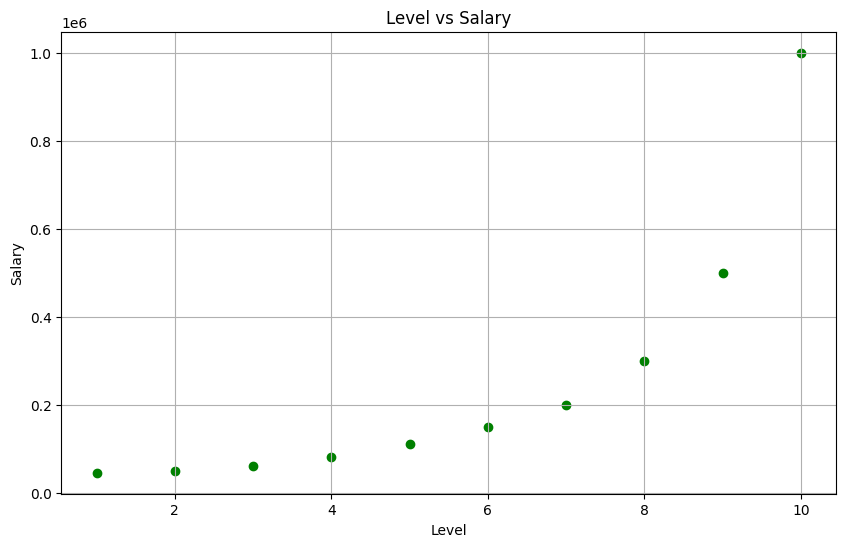

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Level'], dataset['Salary'], color='green')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Level vs Salary')
plt.grid(True)
plt.show()

<ipython-input-12-5c56a2f68974>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset['Level'], y=dataset['Salary'], palette='pastel')


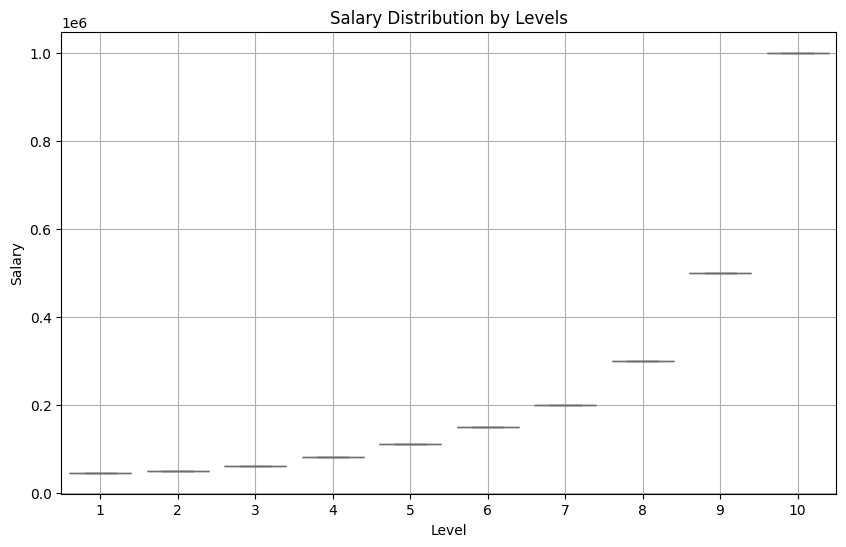

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['Level'], y=dataset['Salary'], palette='pastel')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Salary Distribution by Levels')
plt.grid(True)
plt.show()

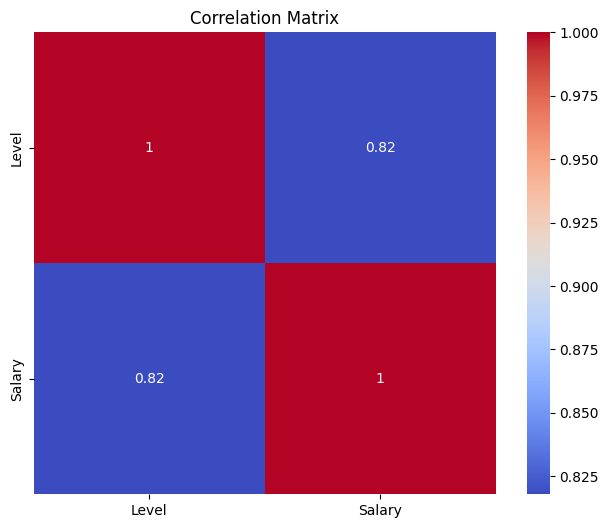

In [9]:
correlation_matrix = dataset.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## Training the Decision Tree Regression model on the whole dataset

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

## Predicting a new result

In [14]:
regressor.predict([[6.5]])

array([150000.])

## Visualising the Decision Tree Regression results (higher resolution)

<ipython-input-15-ad2650214b99>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


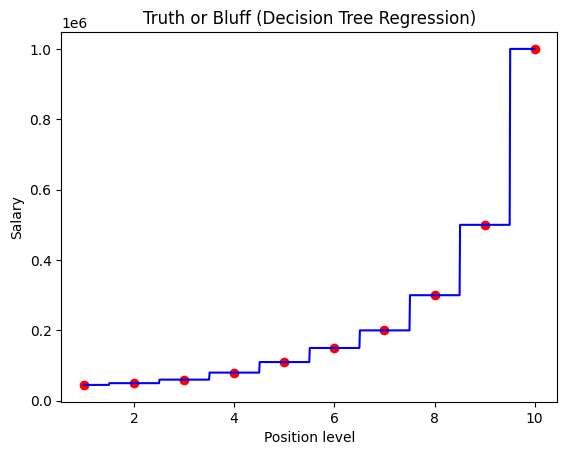

In [15]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()